In [40]:
import pandas as pd
import numpy as np

import pymc as pm

In [41]:
click_df = pd.read_csv("Data_ver2.csv")

click_df.head(100)

,user,tab,list,par,pic,sumClicks,avgTime,clicks1,click2,time1,time2
0,P1,1,0,0,0,3,7167.950,2,1,13032.70,1303.2
1,P1,1,0,0,1,5,1579.325,4,1,687.45,2471.2
2,P1,0,1,0,0,2,94775.900,1,1,188295.80,1256.0
3,P1,0,1,0,1,3,1225.800,1,2,673.60,1778.0
4,P1,0,0,1,0,3,1560.500,1,2,629.80,2491.2
...,...,...,...,...,...,...,...,...,...,...,...
95,S6,0,0,1,1,3,66920.900,1,2,13227.00,120614.8
96,S7,1,0,0,0,5,64688.500,3,2,48069.00,81308.0
97,S7,1,0,0,1,3,76430.500,1,2,13289.00,139572.0
98,S7,0,1,0,0,1,14723.000,1,0,14723.00,NaN


In [42]:
# Create the features and response
X = click_df.loc[:, ['tab','list','par','pic']]
y = click_df.loc[:, 'sumClicks']

In [43]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sigma = 10)

    # Slope
    slopeTab = pm.Normal('slopeTab', mu = 0, sigma = 10)
    slopeList = pm.Normal('slopeList', mu = 0, sigma = 10)
    slopePar = pm.Normal('slopePar', mu = 0, sigma = 10)
    slopePic = pm.Normal('slopePic', mu = 0, sigma = 10)

    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma = 10)

    # Estimate of mean
    mean = intercept + slopeTab * X.loc[:, 'tab'] + slopeList * X.loc[:, 'list'] + slopePar * X.loc[:, 'par'] + slopePic * X.loc[:, 'pic']

    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sigma = sigma, observed = y.values)

    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(draws=1000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slopeTab, slopeList, slopePar, slopePic, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'slopeTab'}>,
        <Axes: title={'center': 'slopeList'}>],
       [<Axes: title={'center': 'slopePar'}>,
        <Axes: title={'center': 'slopePic'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

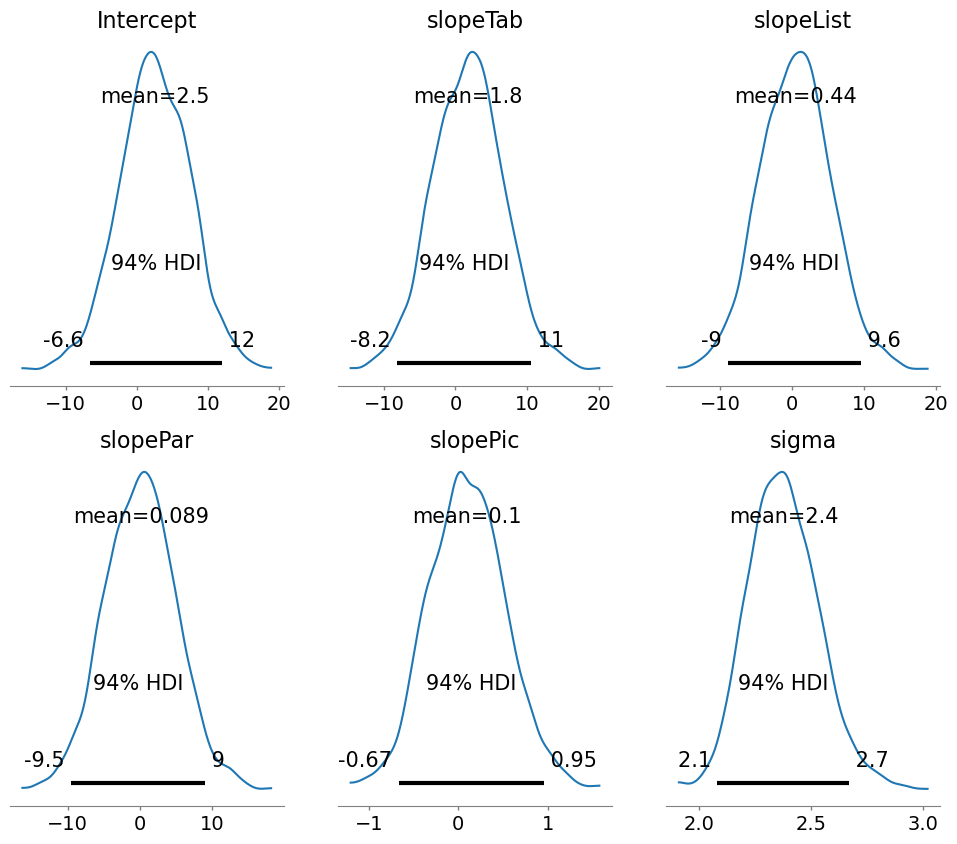

In [44]:
pm.plot_posterior(linear_trace, figsize = (12, 10))